In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

from wxdata import radar, geog

import matplotlib.pyplot as plt
%matplotlib inline

%env WORKDIR ~/Documents/weatherpy-work

env: WORKDIR=~/Documents/weatherpy-work


In [2]:
order = radar.OrderLevel2()
selection = order.select_around('KVNX', '2012-04-15 00:27')
selection.items

['2012/04/15/KVNX/KVNX20120415_002743_V06.gz']

In [3]:
file = selection[0].download()[0]

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-01-30 01:44:16.915138. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


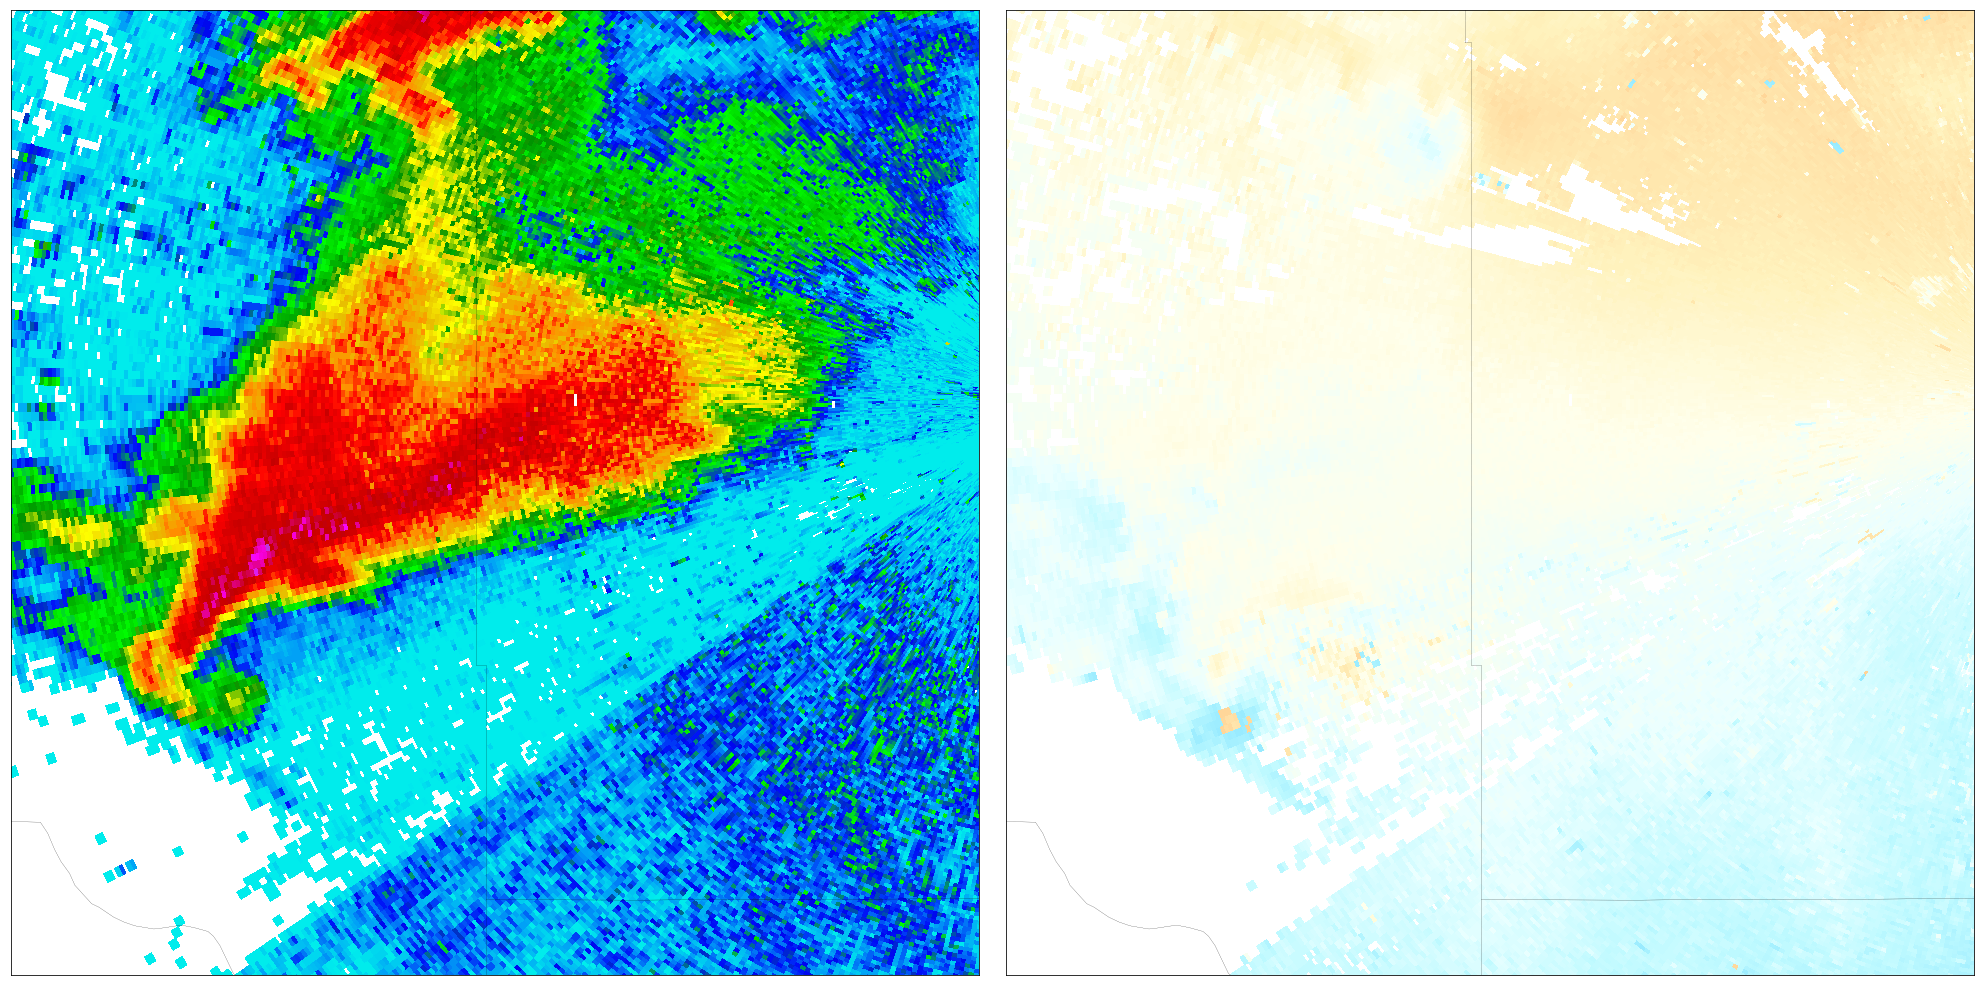

In [15]:
import pyart
sample = pyart.io.read_nexrad_archive(file)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(28, 14))
plt.tight_layout()

# zoom used to be (120, 100)
sample, display1 = radar.plot_level2(sample, 'reflectivity', sweep=0, zoom_km=(40, 30), 
                                    shift_latlon=(-0.05, -0.4), ax=ax1)

sample, display2 = radar.plot_level2(sample, 'velocity', sweep=1, 
                                     basemap=display1.basemap, ax=ax2)

# from wxdata.plotting import bottom_right_textbox, inset_colorbar
# timestamp = radar.timestamp_from_filename(file)

# title = 'KVNX Reflectivity (dbZ) {}\nGraphic Created by Jim Tang (@wxmann)'.format(
#     timestamp.strftime('%Y-%m-%d %H:%M:%S'))

# bottom_right_textbox(display.basemap.ax, title)
# inset_colorbar(display.plots[0], display.basemap.ax, tickcolor='white', loc=2, width='50%')